
# Object Detection


In [1]:
import torch
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# run on GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device {device}')
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from torchvision.utils import draw_bounding_boxes

plt.rcParams["savefig.bbox"] = 'tight'

# utility function to show images

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Using device cuda


#### Visualizing a grid of images


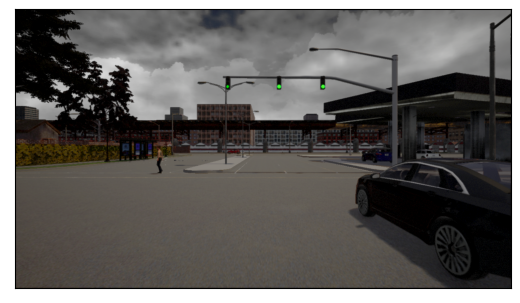

In [2]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import glob

images_names = glob.glob('test/*.png')[1:2]
images_list = [read_image(img)[:3 , : , :] for img in images_names]
grid = make_grid(images_list)
show(grid)

### YOLO v8 model Object detection


image 1/1 /home/o/Desktop/carla/PythonAPI -0.9.9/Towards-Enhanced-Autonomous-Driving-Experience/AV/visual perception/test/00000946.png: 384x640 1 person, 2 cars, 3 traffic lights, 65.3ms
Speed: 2.4ms preprocess, 65.3ms inference, 129.0ms postprocess per image at shape (1, 3, 384, 640)


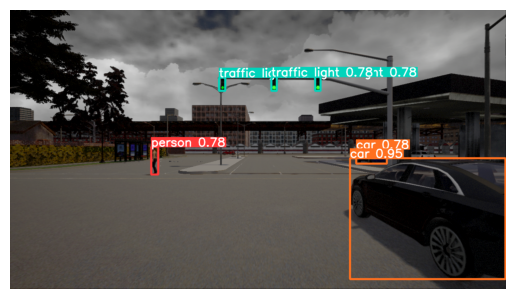

In [5]:
from ultralytics import YOLO
import cv2 
import matplotlib.pyplot as plt

# Load a model
model = YOLO('yolov8x.pt')  # load an official model

# cerate a subplots 
fig, axs = plt.subplots(ncols=len(images_names), squeeze=False)
# Predict with the model
for i, img in enumerate(images_names):
    results = model.predict(img, conf=0.5)[0].plot()
    cv2.imwrite(f'results/{i}.jpg', results)
    axs[0, i].axis("off")
    axs[0, i].imshow(cv2.cvtColor(results, cv2.COLOR_BGR2RGB))

#### bounding boxes produced by torchvision detection models

Here is a Faster R-CNN model loaded from
: `torchvision.models.detection.fasterrcnn_resnet50_fpn`
model.



In [6]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights


weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(image) for image in images_list]

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model(images)

We will only plot the boxes with a score greater than a given threshold.



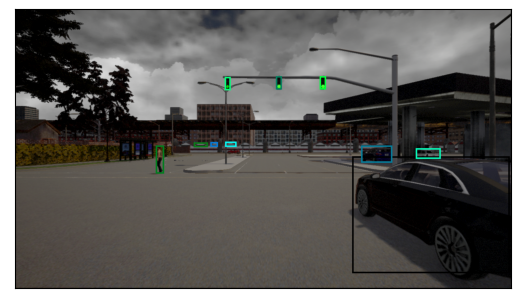

In [7]:
score_threshold = .5
img_with_boxes = [
    draw_bounding_boxes(img, boxes=output['boxes'][output['scores'] > score_threshold] , width=4)
    for img, output  in zip(images_list, outputs)
]
show(img_with_boxes)